<a href="https://colab.research.google.com/github/dhiru-c/CAPSTONE_PROJECT-HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Importing Libraries**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **Importing the csv file**

In [36]:
# Defining path
url = 'https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm'

# Importing dataset to create a dataframe
df = pd.read_csv(url)

## **Some Basic Checks**

In [37]:
# Checking shape pf dataframe
df.shape

(119390, 32)

In [38]:
# Checking top 5 records in dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
# Checking bottom 5 records in dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
#checking stastics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [42]:
#Check all the coloumns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Null Values Checking**

In [43]:
# CHecking number of null values in each column
print(df.isnull().sum().sort_values(ascending=False).head())

print('--*--' *10)
#percent of null values
df.isnull().sum().sort_values(ascending=False).head()/len(df) *100


company      112593
agent         16340
country         488
children          4
lead_time         0
dtype: int64
--*----*----*----*----*----*----*----*----*----*--


company      94.306893
agent        13.686238
country       0.408744
children      0.003350
lead_time     0.000000
dtype: float64

In [44]:
#droping column haveing null values more than 50%
df.drop(['company'],axis = 1,inplace=True)

##*Null Values Treatment*

In [45]:
# If no id of children,agent  is null,replace it with 0
df[['children','agent']] = df[['children','agent']].fillna(0.0)

In [46]:
# For the missing values in the country column, replace it with mode (value that appears most often)
freq_country = df.country.mode().to_string()
df['country'].fillna(freq_country, inplace=True)

In [47]:
# Replacing adults with 1 in Rows where there is no adult, baby and child
df.loc[(df.adults+df.babies+df.children)==0,'adults'] = df.loc[(df.adults+df.babies+df.children)==0,'adults'].replace(0,1)


## **Outlier Detection**

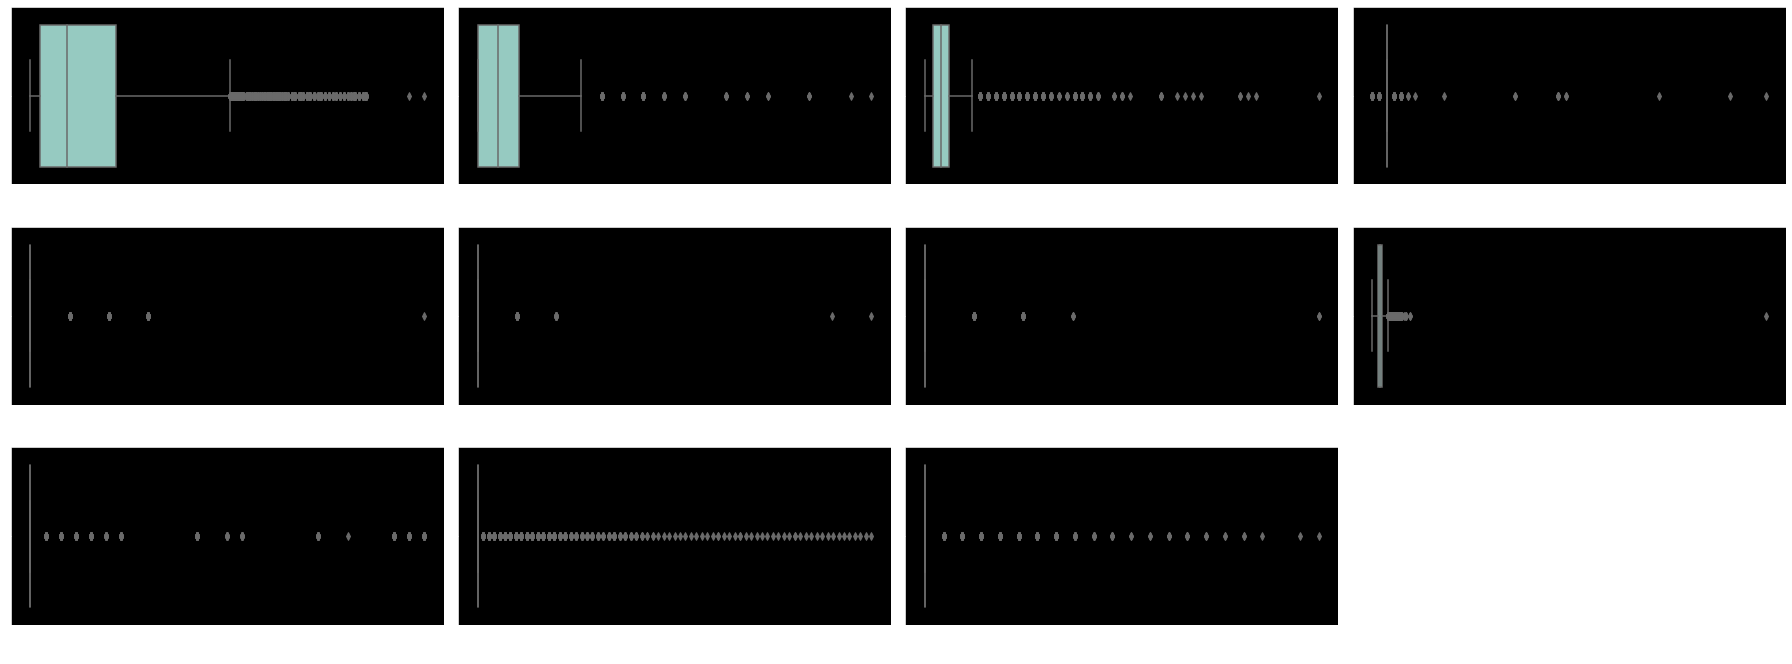

In [48]:
columns =['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
          'children', 'babies', 'required_car_parking_spaces', 'adr',
          'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']

n = 1
plt.figure(figsize=(25,15))
for column in columns:
  # plt.subplots(4,6)
  plt.subplot(5, 4, n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

## **Function for Outlier removal**

In [49]:
def outlier_removal(str):
  # Finding the IQR
  q1 = df[str].quantile(0.25)
  q3 = df[str].quantile(0.75)
  iqr=q3-q1

  # To find upper and lower limit
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr

  # selecting records having  Outliers
  df[df[str] > upper_limit]
  df[df[str] < lower_limit]

  # Trimming using upper limit 
  # not triming by using lower limit since there is no outlier in lower limit
  new_df = df[df[str] < upper_limit]
  print(f"{str}" , new_df.shape)
  print()

  #Plotting the graph before treating outlier
  print(f'for {str} column  this are the graph ''BEFORE'' removing outliers')
  print( )
   
  plt.figure(figsize=(16,8))
  plt.subplot(2,2,1)
  sns.distplot(df[str])
  plt.subplot(2,2,2)
  sns.boxplot(df[str])
  plt.show()

  # Plotting after trimming the outlier
  print()
  print(f'for {str} column  this are the graph ''AFTER'' trimming outliers')
  print()
  plt.figure(figsize=(16,8))
  plt.subplot(2,2,3)
  sns.distplot(new_df[str])
  plt.subplot(2,2,4)
  sns.boxplot(new_df[str])
  plt.show()


  # Capping  ( It means that the  value is set so that their values does not go beyond a certain limit}
  new_df_cap = df.copy()
  new_df_cap[str] = np.where(
      new_df_cap[str] > upper_limit,
      upper_limit,
      np.where(
          new_df_cap[str] < lower_limit,
          lower_limit,
          new_df_cap[str]
      )
  )


  #Plotting after capping the outlier
  print()
  print(f'for {str} column  this are the graph ''AFTER'' Capping outliers')
  print()
  plt.subplot(2,2,3)
  sns.distplot(new_df_cap[str])
  plt.subplot(2,2,4)
  sns.boxplot(new_df_cap[str])
  plt.show()

## **Outlier removal**

lead_time (116356, 31)

for lead_time column  this are the graph BEFORE removing outliers



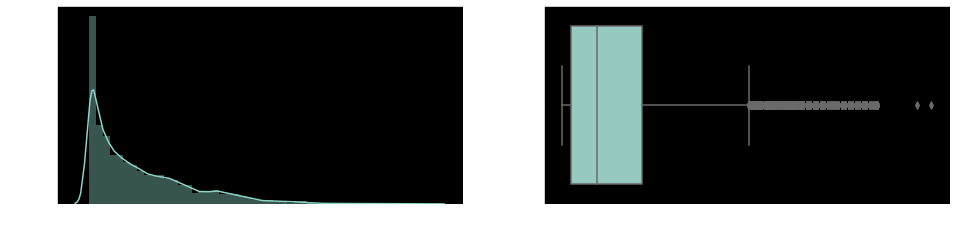


for lead_time column  this are the graph AFTER trimming outliers



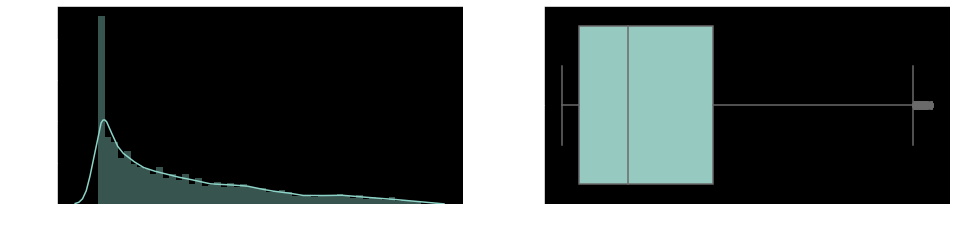


for lead_time column  this are the graph AFTER Capping outliers



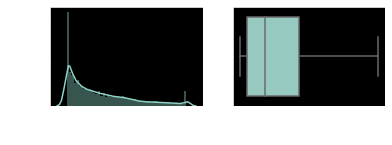

stays_in_weekend_nights (119046, 31)

for stays_in_weekend_nights column  this are the graph BEFORE removing outliers



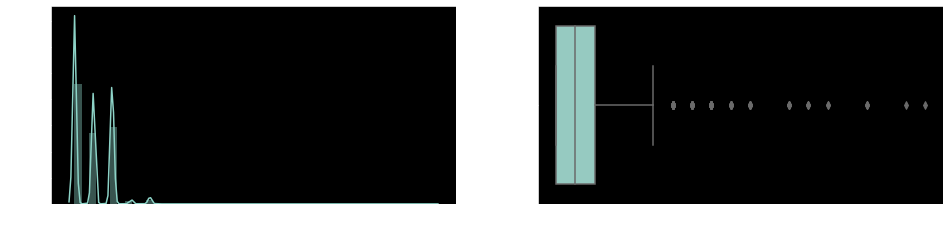


for stays_in_weekend_nights column  this are the graph AFTER trimming outliers



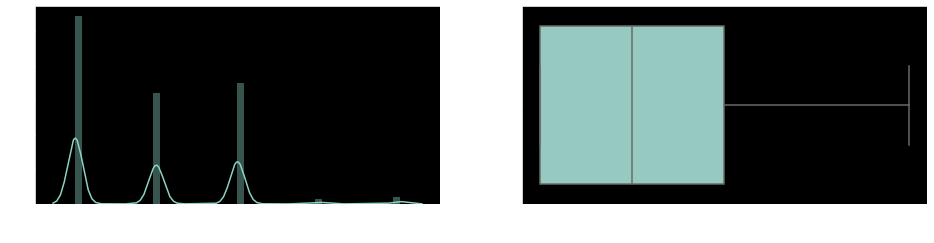


for stays_in_weekend_nights column  this are the graph AFTER Capping outliers



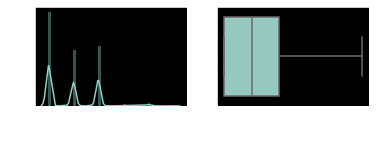

stays_in_week_nights (114537, 31)

for stays_in_week_nights column  this are the graph BEFORE removing outliers



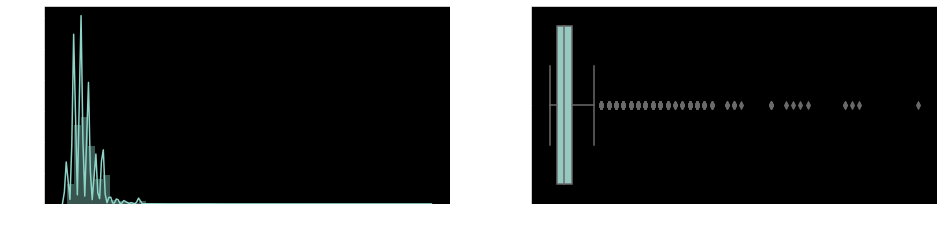


for stays_in_week_nights column  this are the graph AFTER trimming outliers



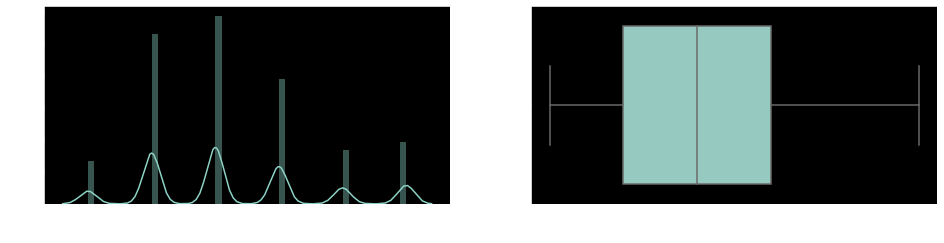


for stays_in_week_nights column  this are the graph AFTER Capping outliers



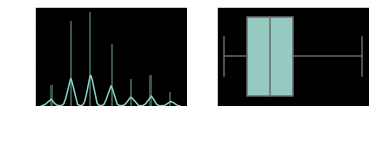

adults (23430, 31)

for adults column  this are the graph BEFORE removing outliers



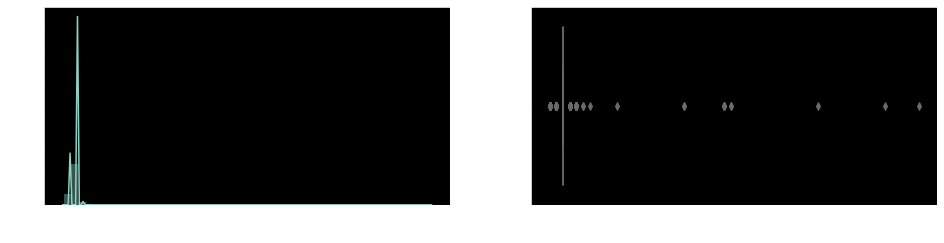


for adults column  this are the graph AFTER trimming outliers



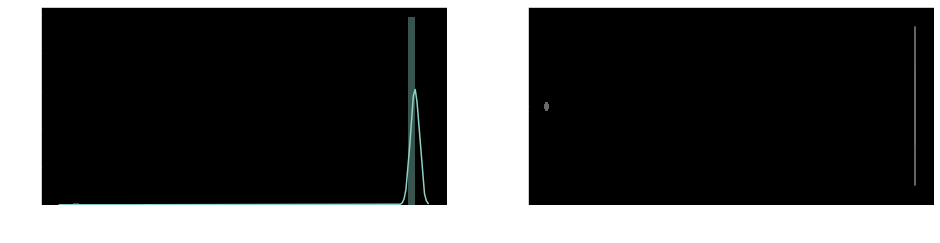


for adults column  this are the graph AFTER Capping outliers



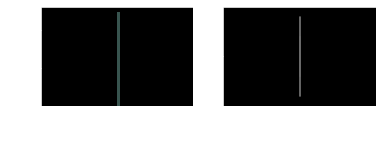

children (0, 31)

for children column  this are the graph BEFORE removing outliers



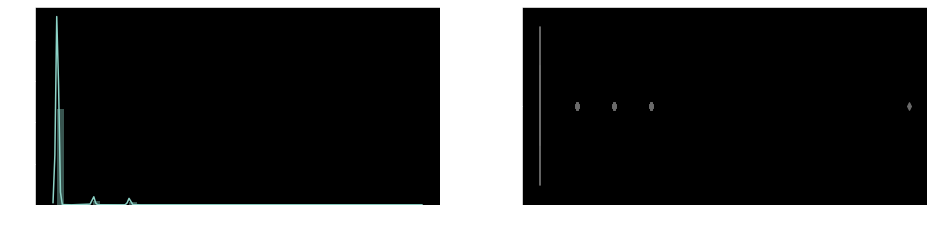


for children column  this are the graph AFTER trimming outliers



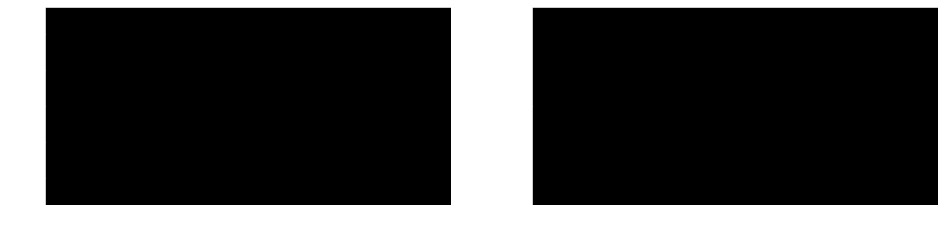


for children column  this are the graph AFTER Capping outliers



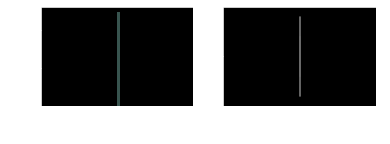

babies (0, 31)

for babies column  this are the graph BEFORE removing outliers



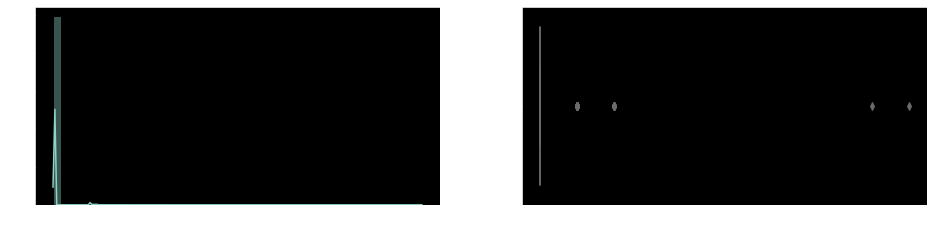


for babies column  this are the graph AFTER trimming outliers



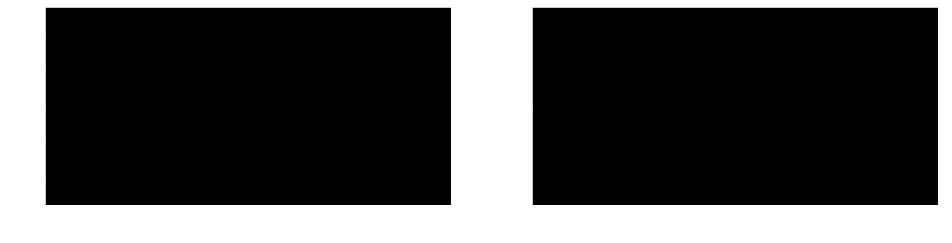


for babies column  this are the graph AFTER Capping outliers



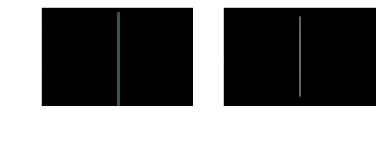

required_car_parking_spaces (0, 31)

for required_car_parking_spaces column  this are the graph BEFORE removing outliers



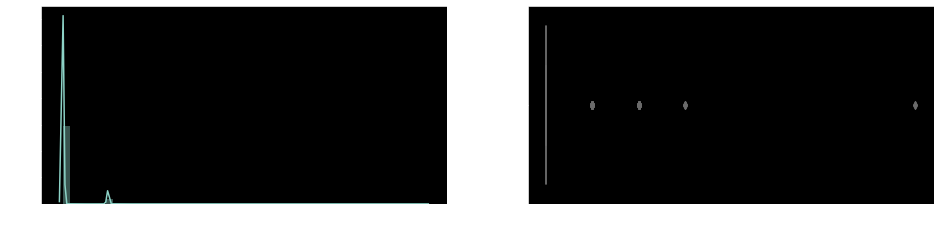


for required_car_parking_spaces column  this are the graph AFTER trimming outliers



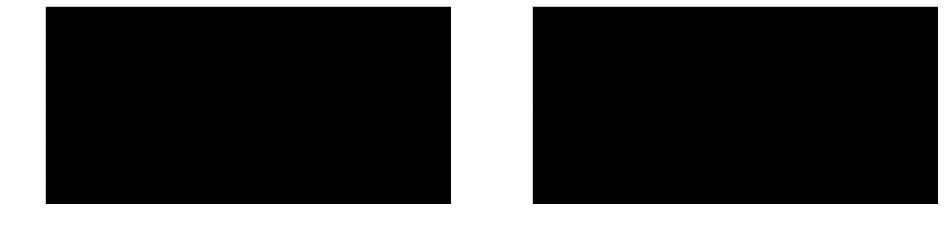


for required_car_parking_spaces column  this are the graph AFTER Capping outliers



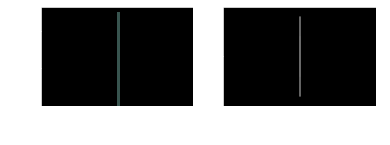

adr (115597, 31)

for adr column  this are the graph BEFORE removing outliers



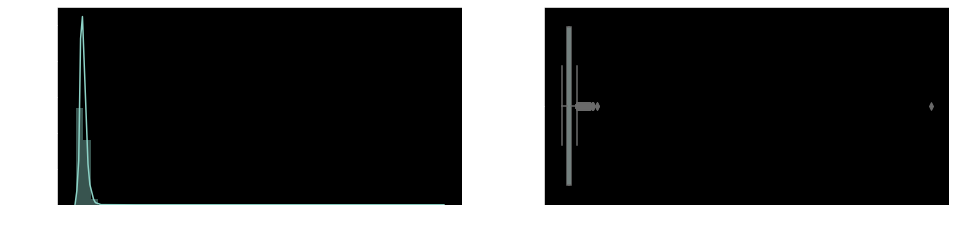


for adr column  this are the graph AFTER trimming outliers



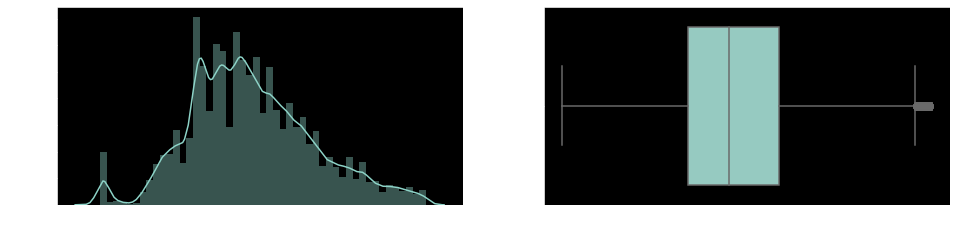


for adr column  this are the graph AFTER Capping outliers



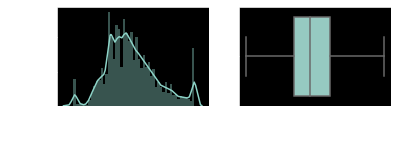

previous_cancellations (0, 31)

for previous_cancellations column  this are the graph BEFORE removing outliers



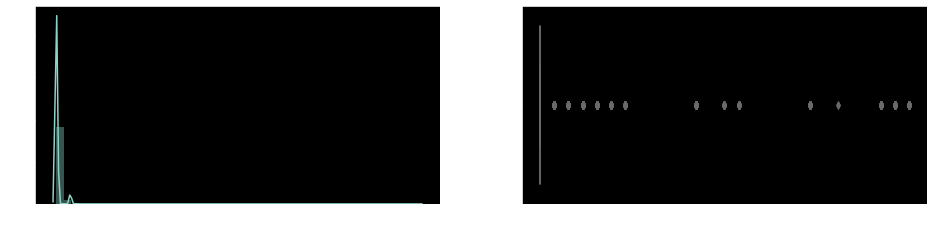


for previous_cancellations column  this are the graph AFTER trimming outliers



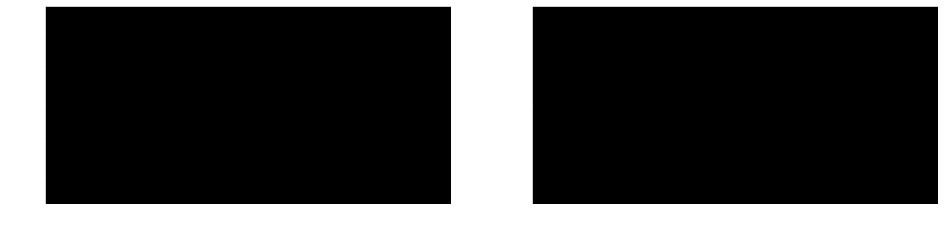


for previous_cancellations column  this are the graph AFTER Capping outliers



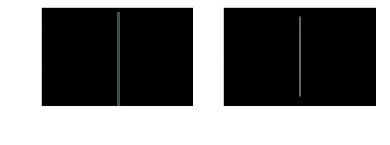

previous_bookings_not_canceled (0, 31)

for previous_bookings_not_canceled column  this are the graph BEFORE removing outliers



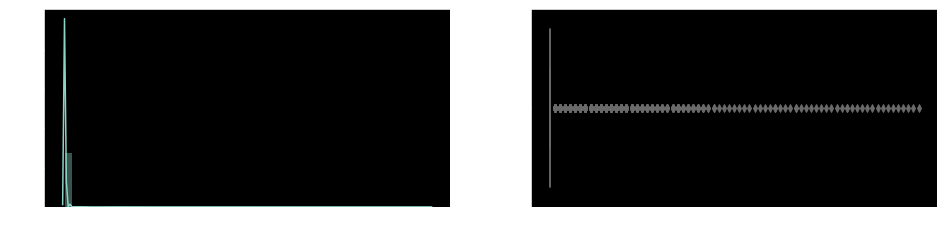


for previous_bookings_not_canceled column  this are the graph AFTER trimming outliers



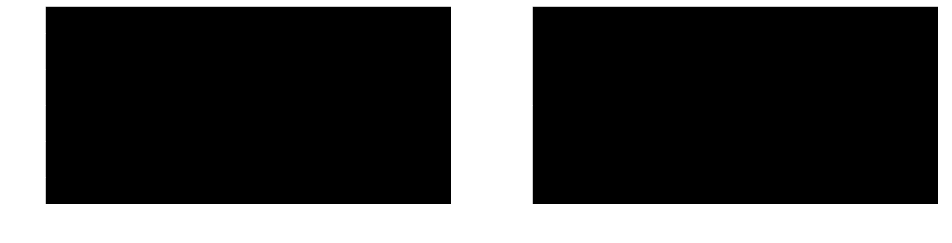


for previous_bookings_not_canceled column  this are the graph AFTER Capping outliers



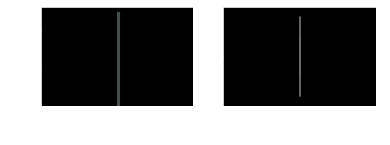

booking_changes (0, 31)

for booking_changes column  this are the graph BEFORE removing outliers



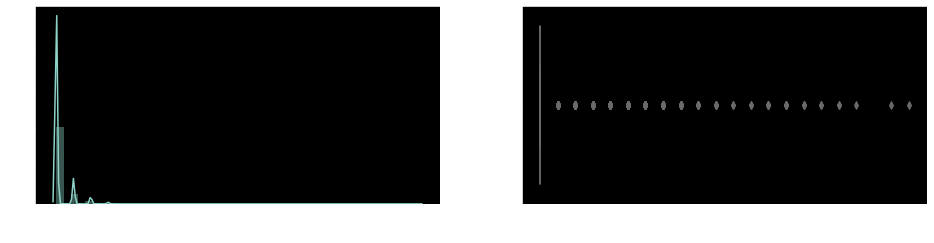


for booking_changes column  this are the graph AFTER trimming outliers



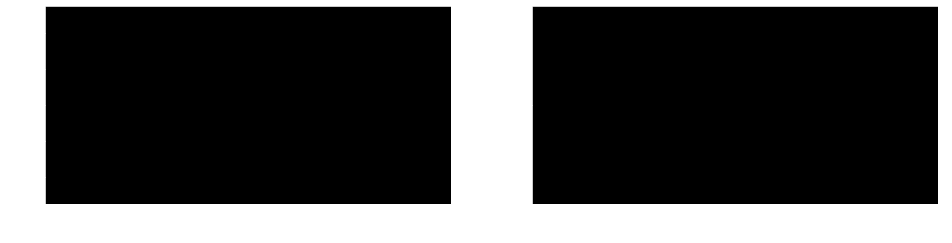


for booking_changes column  this are the graph AFTER Capping outliers



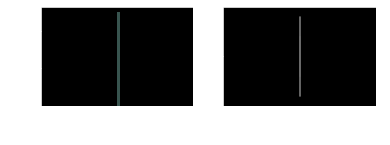

In [50]:
for column in columns:
  outlier_removal(column)

In [51]:
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.children > 8, 'children'] = 0
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5

## **Manipulating dataset**

In [52]:
# Converting the datatype of relevant columns from float to integer
df[['children', 'agent','adr']] = df[['children', 'agent','adr']].astype('int64')

In [53]:
# Making new boolean column same_room
df['same_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'], '1', '0')

df.same_room.value_counts()

1    104473
0     14917
Name: same_room, dtype: int64

In [54]:
#creating some new features
df['total_children'] = df['children'] + df['babies']
df['total_members'] = df['total_children'] + df['adults']
df['total_no_of_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [55]:
# Creating a dataframe by slicing the original df where bookings were not cancelled
df_not_cancelled = df[df['is_canceled'] == 0]

In [56]:
#to find the duplicates
print(len(df[df.duplicated()]))
q=df[df.duplicated()]
q

32063


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,total_children,total_members,total_no_of_nights
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98,0,1,Check-Out,2015-07-03,1,0,2,2
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,0,Transient,84,0,1,Check-Out,2015-07-07,1,0,2,6
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,0,Transient,137,0,1,Check-Out,2015-07-07,1,0,2,5
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,0,Transient,97,0,0,Canceled,2015-07-01,1,0,2,1
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,109,0,3,Check-Out,2015-07-08,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,126,0,2,Check-Out,2017-09-03,1,0,2,3
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195,0,2,Check-Out,2017-09-03,1,0,3,3
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195,0,2,Check-Out,2017-09-03,1,0,3,3
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195,0,2,Check-Out,2017-09-03,1,0,3,3


# Exploratory Data Analysis

In [57]:
hotel_df = df.copy()

In [58]:
#to drop the row where the booking is canceled
confirm_booking_df = df[df['is_canceled']==0]

In [59]:
#to write the function to count the values
def get_value_count(column,limit=None):

  if limit == None:
    x=column.value_counts()
  else:
    x=column.value_counts()[:limit]

  return x

In [60]:
#to write a function to plot a graph
def plot(x,y,chart=None,x_lable=None,y_lable=None,tittle=None,background=None):
  
  if chart == None:
      plt.plot(x,y)
  if chart == 'bar':
      plt.bar(x,y)
  if chart == 'pie':
      plt.pie(x,y)
  # if chart == None:
  #     plt.plot(x,y)


  if x_lable != None:
    plt.xlabel(x_lable)
  if y_lable != None:
    plt.ylabel(y_lable)
  if tittle != None:
    plt.title(tittle)
  if background != None:
    plt.style.use(background)
  plt.show()

##Comparing city hotel and resort hotel

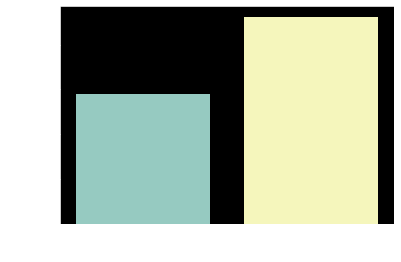

In [61]:
import seaborn as sns
sns.countplot(df_not_cancelled['hotel'])

##Booking cancellation ratio or Checking booking data

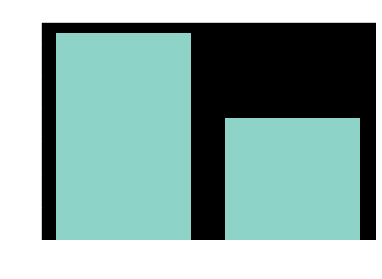

In [62]:
canceled_booking_ratio = get_value_count(hotel_df['is_canceled'])
canceled_booking_ratio = canceled_booking_ratio.reset_index()
canceled_booking_ratio['percent'] = canceled_booking_ratio['is_canceled'] * 100 / hotel_df['hotel'].count()

# sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_cancelled)
# canceled_booking_ratio['percent'].plot(kind='bar').figsize=(7,5)

plot(canceled_booking_ratio['index'],canceled_booking_ratio['percent'],'bar','booking_canceled 0=NO , 1=YES','booking%','Canceled Booking Ratio','dark_background')

##checking country origin

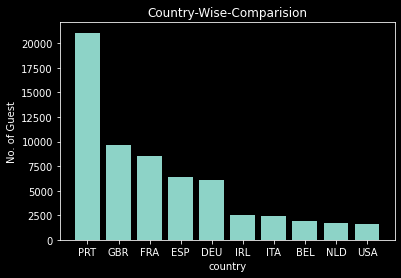

In [63]:
# most guest comming from which country

guest_from_country=get_value_count(df_not_cancelled['country'],limit=10).reset_index()
guest_from_country
plot(guest_from_country['index'],guest_from_country['country'],'bar','country','No. of Guest','Country-Wise-Comparision','fast')

##Checking Year Wise Comparison of the Bookings

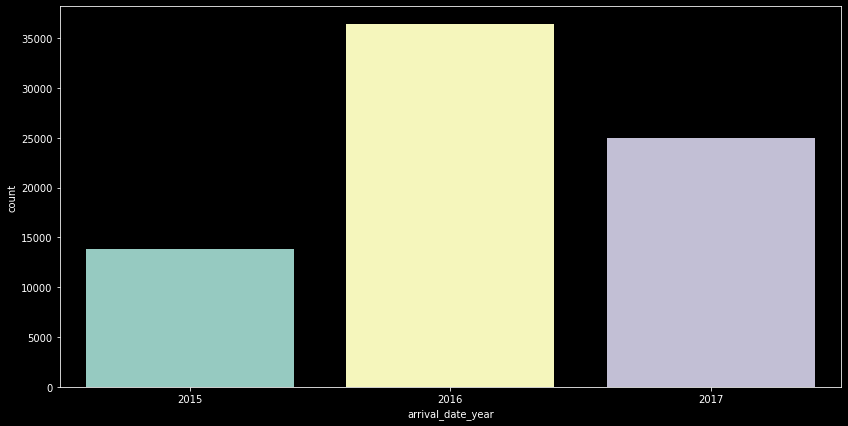

In [64]:
plt.figure(figsize=(14,7))
sns.countplot(df_not_cancelled['arrival_date_year'])

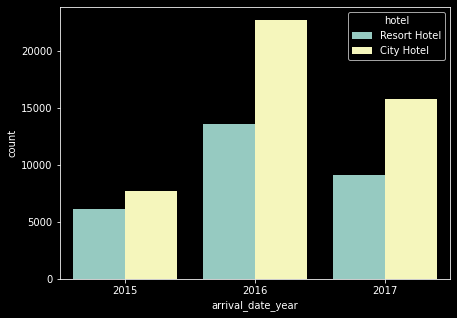

In [65]:
#according to hotel
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=confirm_booking_df);